In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import json
from sklearn.cluster.bicluster import SpectralBiclustering, SpectralCoclustering
%matplotlib inline

In [2]:
with open('Pearson_ica.json') as data_file:    
    data = json.load(data_file)['data']
print len(data), len(data[0])

113 1830


In [20]:
print data[33][1445]

0.19


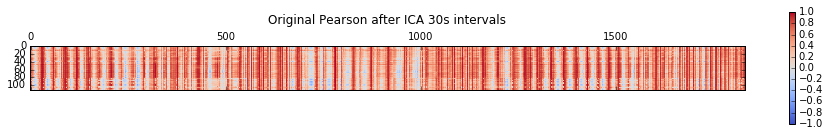

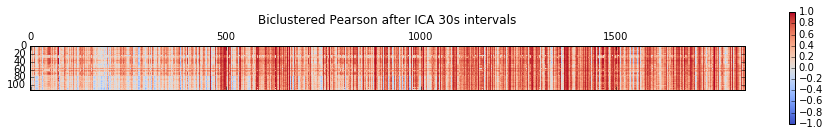

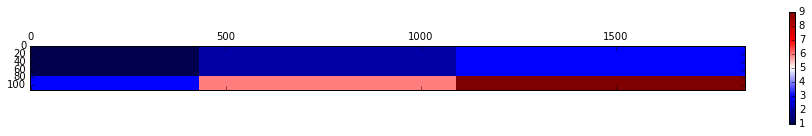

In [6]:
post_process_data = np.array(data)
spectral_model = SpectralBiclustering((3,3))
spectral_model.fit(post_process_data)
fit_data = post_process_data[np.argsort(spectral_model.row_labels_)]
fit_data = fit_data[:, np.argsort(spectral_model.column_labels_)]
plt.matshow(post_process_data, cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
plt.colorbar()
plt.title('Original Pearson after ICA 30s intervals\n')
# plt.savefig('../media/json/pearson/ICA/pearson_ICA_30s.png')
plt.matshow(fit_data, cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
plt.colorbar()
plt.title('Biclustered Pearson after ICA 30s intervals\n')
# plt.savefig('../media/json/pearson/ICA/pearson_ICA_30s.png')
plt.matshow(np.outer(np.sort(spectral_model.row_labels_) + 1,
                     np.sort(spectral_model.column_labels_) + 1),
            cmap=plt.cm.seismic)
plt.colorbar()

In [3]:
# all intervals and edges
bins = 200
sets = []
for i in range(-bins/2, bins/2):
    low_bnd = round(float(i)/(bins/2), 2)
    sets.append(low_bnd)
# sets = [-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# dictionary = {}
num = []
for i in range(len(sets)):
#     dictionary[sets[i]] = 0
    num.append(0)
    
for row in data:
    for val in row:
        for lower in range(len(sets)):
            if lower != len(sets) - 1:
                if (val >= sets[lower] and val < sets[lower+1]):
#                     dictionary[sets[lower]] += 1
                    num[lower] += 1
            else:
                if (val >= sets[lower]):
#                     dictionary[sets[lower]] += 1
                    num[lower] += 1
# print dictionary
print num
# print sets

[128, 177, 148, 41, 14, 39, 12, 11, 7, 23, 16, 9, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 4, 1, 3, 3, 0, 0, 1, 1, 2, 0, 4, 2, 1, 0, 2, 2, 2, 6, 2, 6, 7, 9, 11, 11, 10, 18, 19, 21, 17, 33, 39, 50, 33, 58, 56, 68, 83, 84, 73, 98, 105, 119, 137, 143, 150, 178, 193, 190, 201, 201, 248, 255, 312, 302, 325, 355, 392, 437, 472, 533, 561, 587, 600, 653, 745, 736, 776, 835, 854, 910, 1015, 376, 2393, 415, 1116, 1168, 1224, 1359, 1286, 1361, 1348, 1447, 1457, 1517, 1541, 1594, 1591, 1603, 1648, 1600, 1716, 1745, 1778, 1854, 1842, 1858, 1819, 1873, 1872, 1901, 1922, 1843, 1886, 1927, 1974, 2028, 1947, 1992, 2053, 1993, 2127, 2073, 2019, 2121, 2166, 2139, 2118, 2106, 2110, 2133, 2154, 2174, 2194, 2097, 2224, 2284, 2171, 2162, 2217, 2289, 2164, 2261, 2234, 2184, 2243, 2215, 2207, 2133, 2161, 2305, 2184, 2161, 2162, 2255, 2145, 2257, 2268, 2278, 2243, 2264, 2138, 2081, 2016, 2021, 1944, 1837, 1898, 1885, 1946, 1994, 2030, 2086, 2087, 2094, 2055, 1843, 1950, 1944, 1699, 1193, 664, 1118]


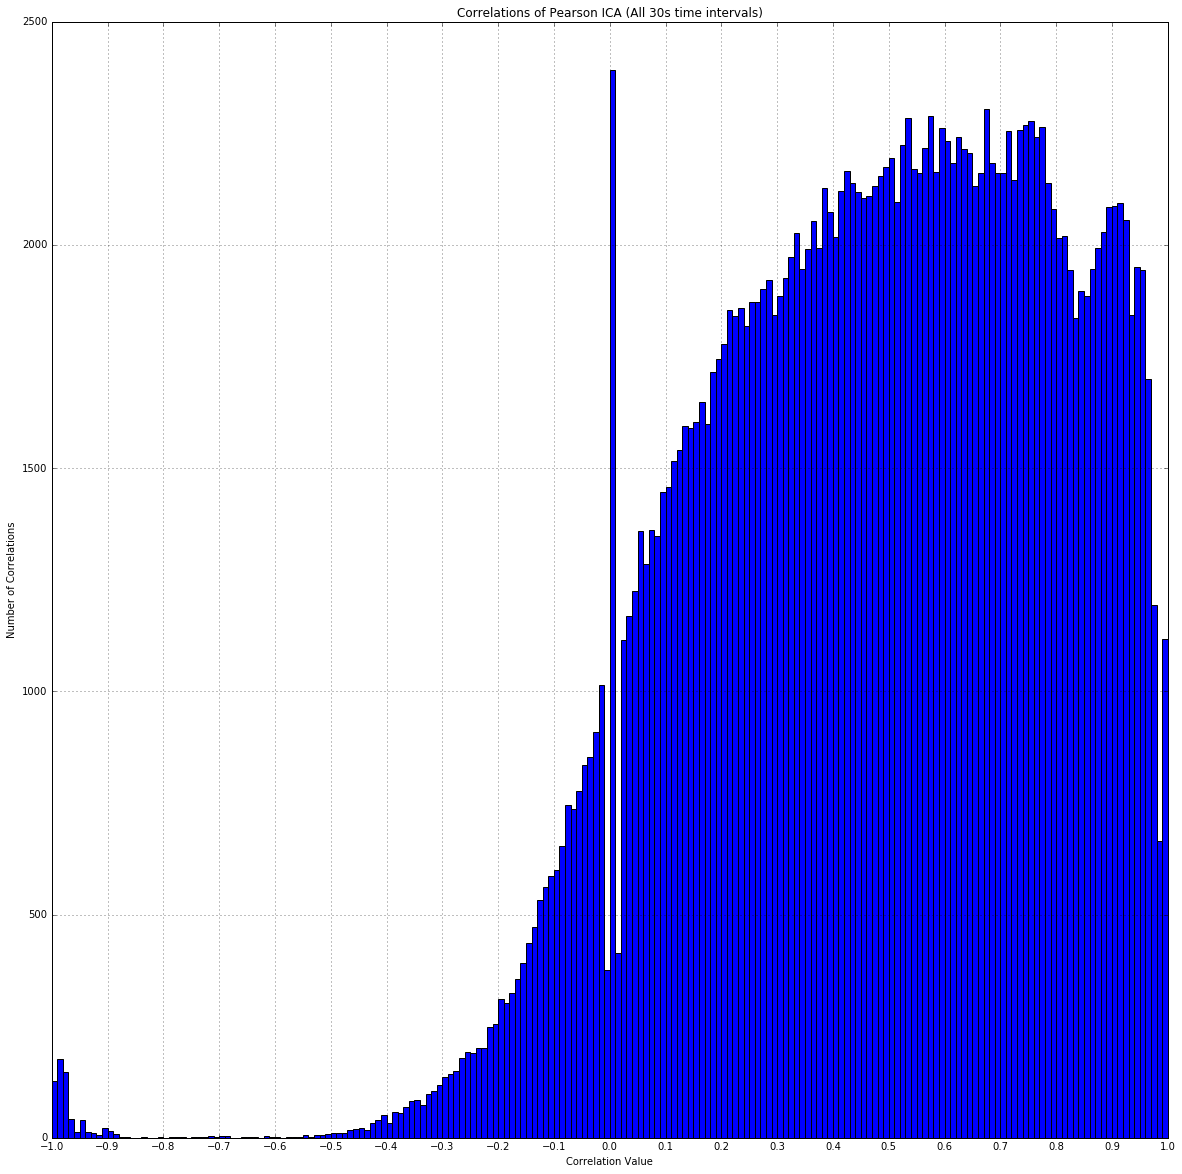

In [4]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,1,1)
ax.bar(sets, num, width= 2.0/bins)
ax.set_title("Correlations of Pearson ICA (All 30s time intervals)")
ax.set_ylabel("Number of Correlations")
ax.set_xlabel("Correlation Value")
ax.grid(True)
ax.set_xticks([-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
# ax.set_xlim([0.4,1])
ax.set_ylim([0, 2500])
# plt.savefig("Correlations_of_ICA_pearson(200_bins).png")
plt.show()

In [17]:
total_zero = 0
zeroed_value = []
for i in range(len(channels_data)):
    for j in range(len(channels_data[i])):
        if channels_data[i][j] == 0:
            zeroed_value.append((i,j))
            total_zero += 1
print total_zero
print zeroed_value

2393
[(0, 49), (0, 461), (0, 513), (0, 660), (0, 670), (0, 671), (0, 700), (0, 758), (0, 760), (0, 766), (0, 882), (0, 1185), (0, 1215), (0, 1254), (0, 1317), (0, 1407), (0, 1437), (0, 1719), (0, 1721), (0, 1762), (0, 1773), (1, 10), (1, 70), (1, 75), (1, 133), (1, 160), (1, 283), (1, 410), (1, 460), (1, 563), (1, 569), (1, 665), (1, 753), (1, 770), (1, 852), (1, 945), (1, 995), (1, 1286), (1, 1322), (1, 1375), (1, 1516), (1, 1539), (1, 1565), (1, 1692), (1, 1763), (2, 76), (2, 105), (2, 164), (2, 166), (2, 239), (2, 300), (2, 302), (2, 351), (2, 624), (2, 665), (2, 675), (2, 772), (2, 882), (2, 901), (2, 942), (2, 992), (2, 1214), (2, 1320), (2, 1405), (2, 1414), (2, 1432), (2, 1492), (2, 1494), (2, 1543), (2, 1584), (2, 1675), (2, 1762), (3, 47), (3, 103), (3, 241), (3, 246), (3, 458), (3, 459), (3, 461), (3, 462), (3, 492), (3, 666), (3, 707), (3, 716), (3, 719), (3, 720), (3, 721), (3, 746), (3, 766), (3, 793), (3, 814), (3, 853), (3, 855), (3, 856), (3, 1348), (3, 1378), (3, 1382)

In [28]:
for i,j in zeroed_value:
    chan1, chan2 = edge_to_channel[j]
    time_start = i * 30000
    time_end = time_start + 30000
    
    if(time_start%60000 == 0):
        time_frame = str(time_start/60000) + ":00 - " + str(time_start/60000) + ":30"
    else:
        time_frame = str(time_start/60000) + ":30 - " + str(time_start/60000 + 1) + ":00"
    print time_frame, edge_to_channel[j], pearsonr(data[chan1][time_start:time_end], data[chan2][time_start:time_end])

 0:00 - 0:30 (0, 50) (0.010850589789530119, 0.060196133247977901)
0:00 - 0:30 (8, 18) (0.010257038921394717, 0.07564330345075708)
0:00 - 0:30 (9, 19) (-0.005687677974127758, 0.32457414700757115)
0:00 - 0:30 (12, 19) (-0.010015267785658581, 0.082799895747636729)
0:00 - 0:30 (12, 29) (-0.0097620135746375736, 0.090874972779931326)
0:00 - 0:30 (12, 30) (0.0075978607245734478, 0.18819007378633332)
0:00 - 0:30 (12, 59) (-0.0047801954433516619, 0.40771333330761816)
0:00 - 0:30 (14, 24) (0.0087830965925569174, 0.12819889199079987)
0:00 - 0:30 (14, 26) (0.0031064621084676705, 0.59055364561351009)
0:00 - 0:30 (14, 32) (-0.0059869461888025768, 0.29976587967111551)
0:00 - 0:30 (16, 59) (-0.0055828261248001918, 0.33357348247458363)
0:00 - 0:30 (24, 46) (0.0077074080375716357, 0.18190042565111642)
0:00 - 0:30 (25, 41) (0.0061347234810737832, 0.28799469305987768)
0:00 - 0:30 (26, 46) (0.0032962061472737699, 0.56806918409960749)
0:00 - 0:30 (28, 44) (-0.001939633976263598, 0.73691552650179459)
0:00 - 

KeyboardInterrupt: 

In [18]:
counter = 0
edge_to_channel = {}
for i in range(61):
    for j in range(i+1, 61):
        edge_to_channel[counter] = (i, j)
        counter += 1
print edge_to_channel

{0: (0, 1), 1: (0, 2), 2: (0, 3), 3: (0, 4), 4: (0, 5), 5: (0, 6), 6: (0, 7), 7: (0, 8), 8: (0, 9), 9: (0, 10), 10: (0, 11), 11: (0, 12), 12: (0, 13), 13: (0, 14), 14: (0, 15), 15: (0, 16), 16: (0, 17), 17: (0, 18), 18: (0, 19), 19: (0, 20), 20: (0, 21), 21: (0, 22), 22: (0, 23), 23: (0, 24), 24: (0, 25), 25: (0, 26), 26: (0, 27), 27: (0, 28), 28: (0, 29), 29: (0, 30), 30: (0, 31), 31: (0, 32), 32: (0, 33), 33: (0, 34), 34: (0, 35), 35: (0, 36), 36: (0, 37), 37: (0, 38), 38: (0, 39), 39: (0, 40), 40: (0, 41), 41: (0, 42), 42: (0, 43), 43: (0, 44), 44: (0, 45), 45: (0, 46), 46: (0, 47), 47: (0, 48), 48: (0, 49), 49: (0, 50), 50: (0, 51), 51: (0, 52), 52: (0, 53), 53: (0, 54), 54: (0, 55), 55: (0, 56), 56: (0, 57), 57: (0, 58), 58: (0, 59), 59: (0, 60), 60: (1, 2), 61: (1, 3), 62: (1, 4), 63: (1, 5), 64: (1, 6), 65: (1, 7), 66: (1, 8), 67: (1, 9), 68: (1, 10), 69: (1, 11), 70: (1, 12), 71: (1, 13), 72: (1, 14), 73: (1, 15), 74: (1, 16), 75: (1, 17), 76: (1, 18), 77: (1, 19), 78: (1, 20),

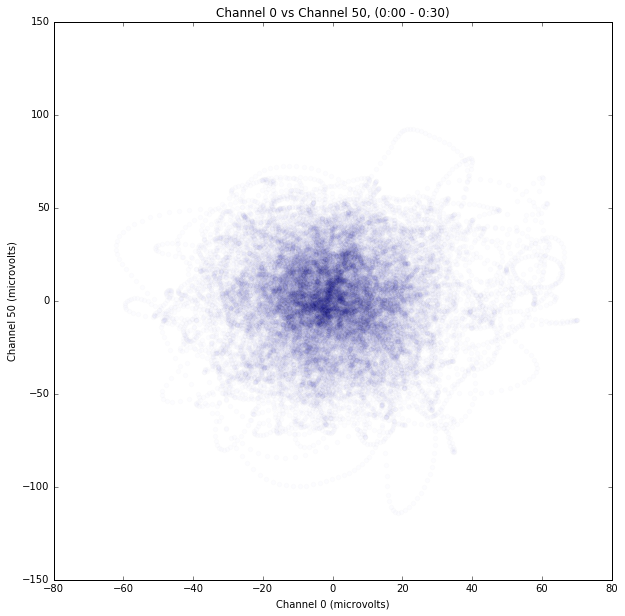

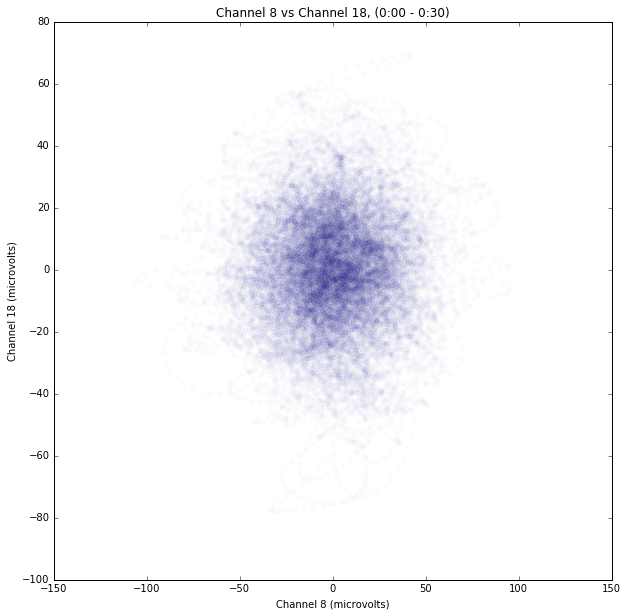

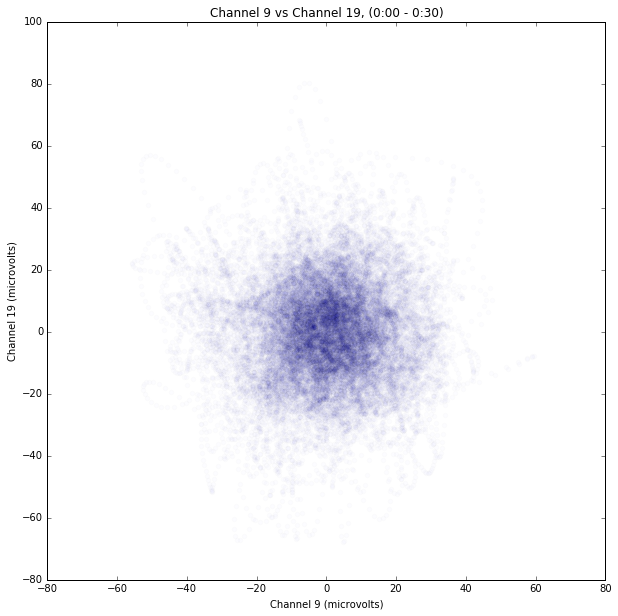

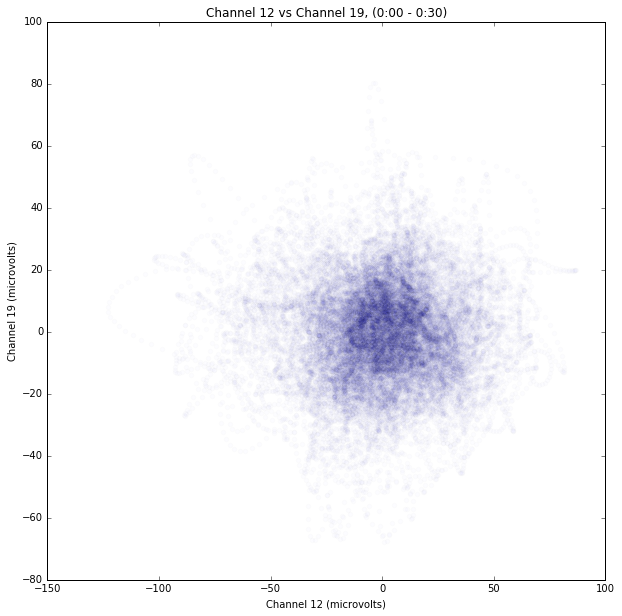

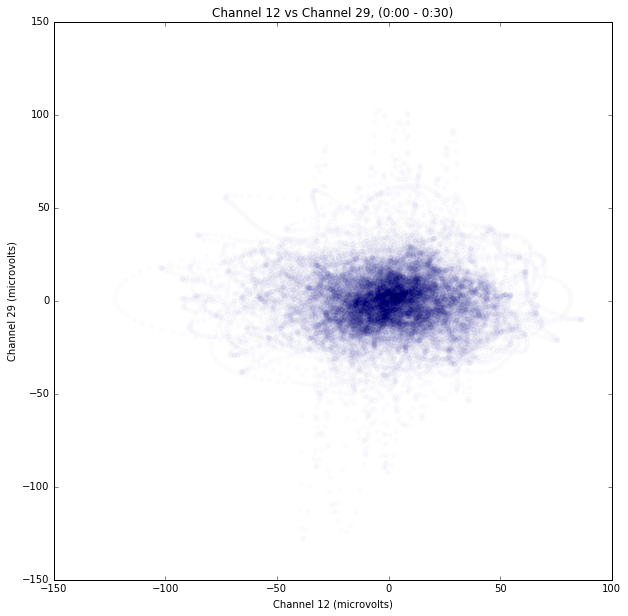

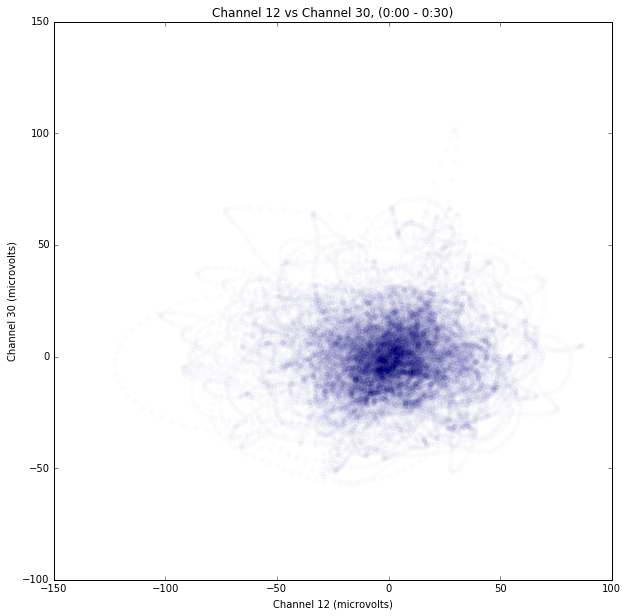

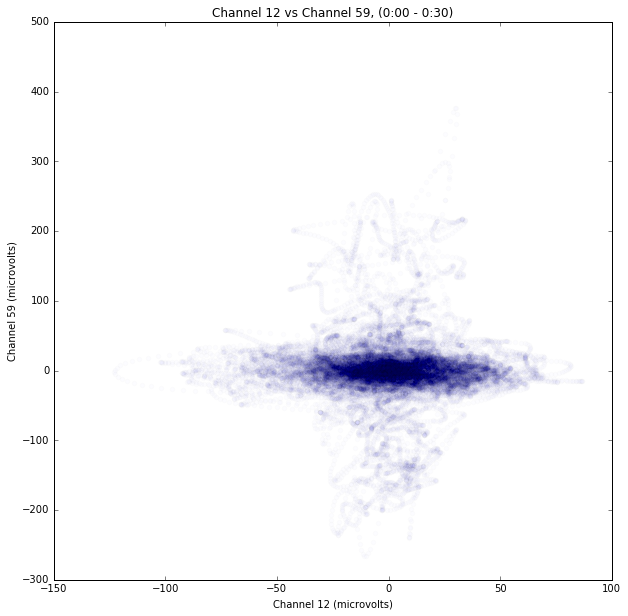

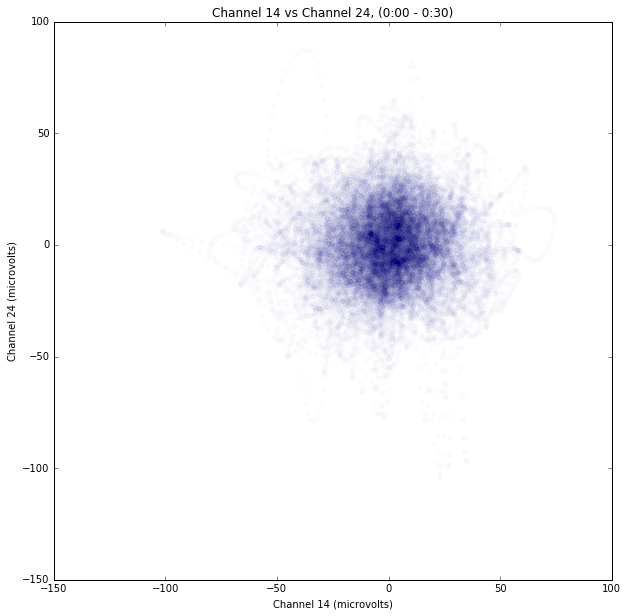

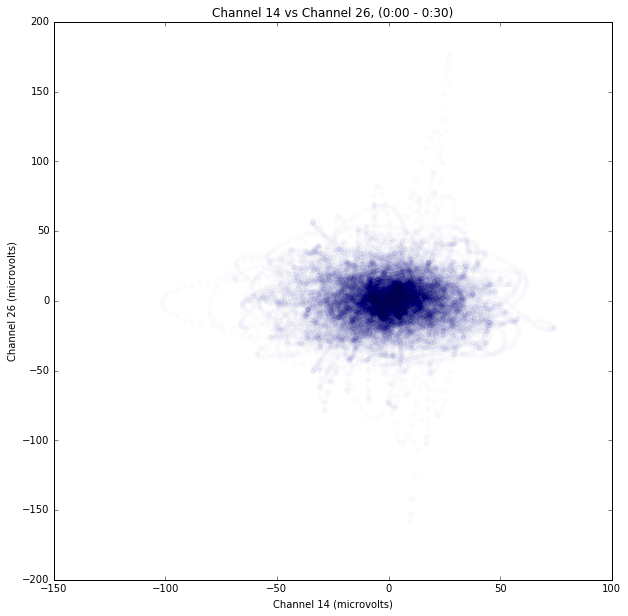

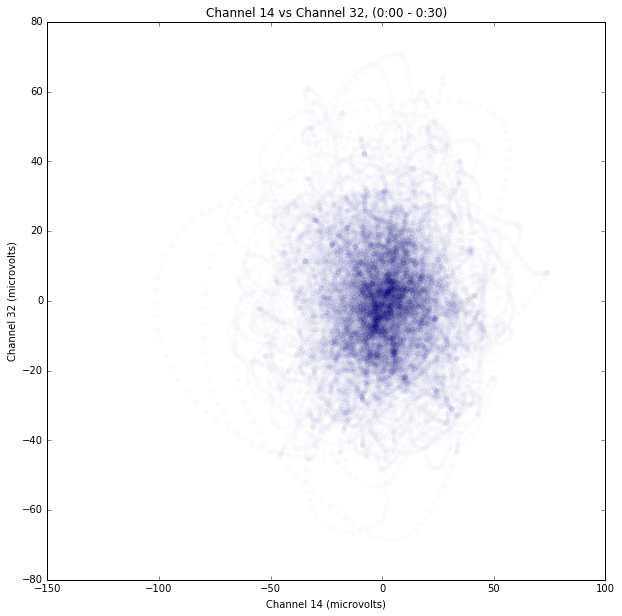

In [39]:
counter = 10
for interval, edge in zeroed_value:
    if counter > 0:
        counter -= 1
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(1,1,1)
        key1, key2 = edge_to_channel[edge]
        time_start = interval * 30000
        time_end = time_start + 30000

        if(time_start%60000 == 0):
            time_frame = str(time_start/60000) + ":00 - " + str(time_start/60000) + ":30"
        else:
            time_frame = str(time_start/60000) + ":30 - " + str(time_start/60000 + 1) + ":00"

        ax.scatter(data[key1][time_start:time_end], data[key2][time_start:time_end], alpha=0.01)
        ax.set_xlabel('Channel %s (microvolts)' %key1)
        ax.set_ylabel('Channel %s (microvolts)' %key2)
        ax.set_title('Channel %s vs Channel %s, (%s)' %(key1, key2, time_frame))
        plt.show()

In [17]:
# total_zero = 0
high_negative = []
for i in range(len(channels_data)):
    for j in range(len(channels_data[i])):
        if channels_data[i][j] < -0.9:
            high_negative.append((i,j))
#             total_zero += 1
# print total_zero
print high_negative

[(112, 0), (112, 1), (112, 2), (112, 3), (112, 4), (112, 5), (112, 7), (112, 8), (112, 10), (112, 11), (112, 12), (112, 13), (112, 14), (112, 15), (112, 16), (112, 17), (112, 18), (112, 19), (112, 21), (112, 22), (112, 23), (112, 27), (112, 28), (112, 29), (112, 30), (112, 34), (112, 35), (112, 36), (112, 37), (112, 40), (112, 41), (112, 42), (112, 43), (112, 44), (112, 45), (112, 46), (112, 47), (112, 48), (112, 49), (112, 50), (112, 52), (112, 53), (112, 54), (112, 56), (112, 57), (112, 65), (112, 68), (112, 79), (112, 83), (112, 84), (112, 85), (112, 90), (112, 92), (112, 97), (112, 98), (112, 117), (112, 118), (112, 123), (112, 126), (112, 137), (112, 141), (112, 142), (112, 143), (112, 148), (112, 149), (112, 150), (112, 155), (112, 156), (112, 175), (112, 176), (112, 180), (112, 183), (112, 194), (112, 198), (112, 199), (112, 200), (112, 205), (112, 207), (112, 212), (112, 213), (112, 232), (112, 233), (112, 236), (112, 239), (112, 250), (112, 254), (112, 255), (112, 256), (112, 

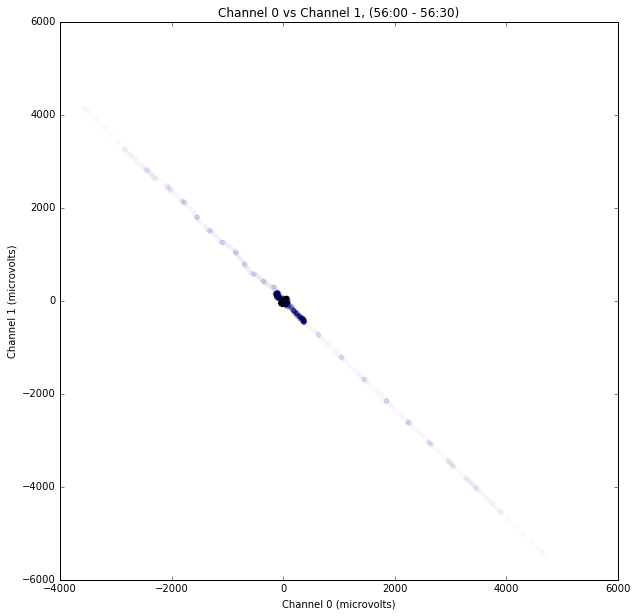

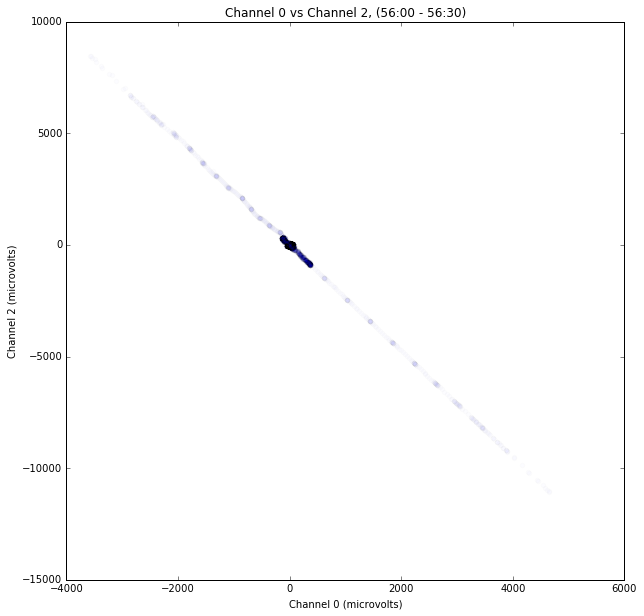

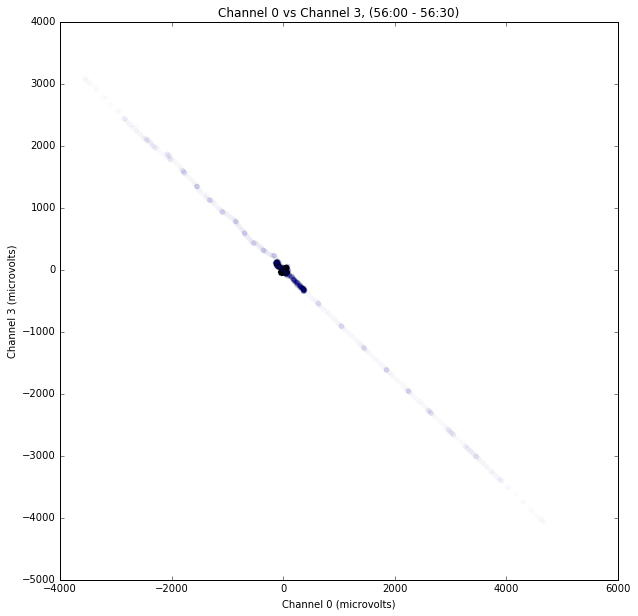

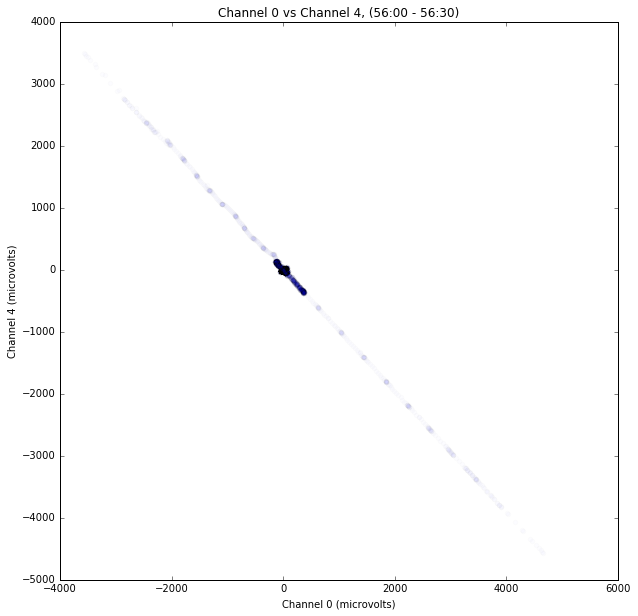

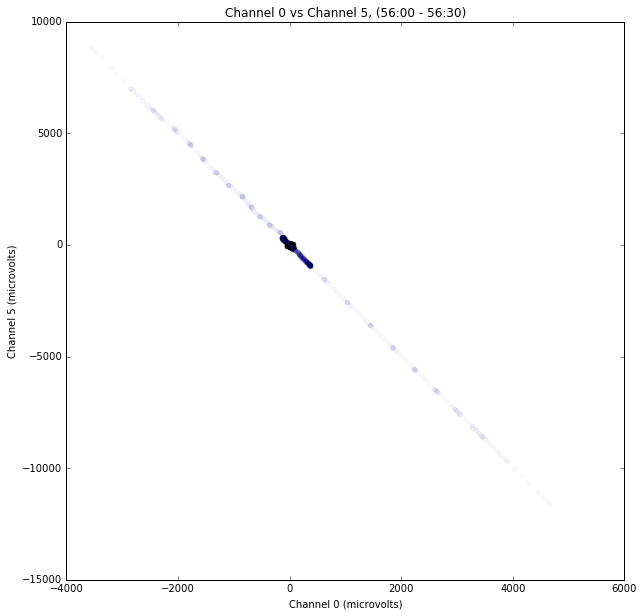

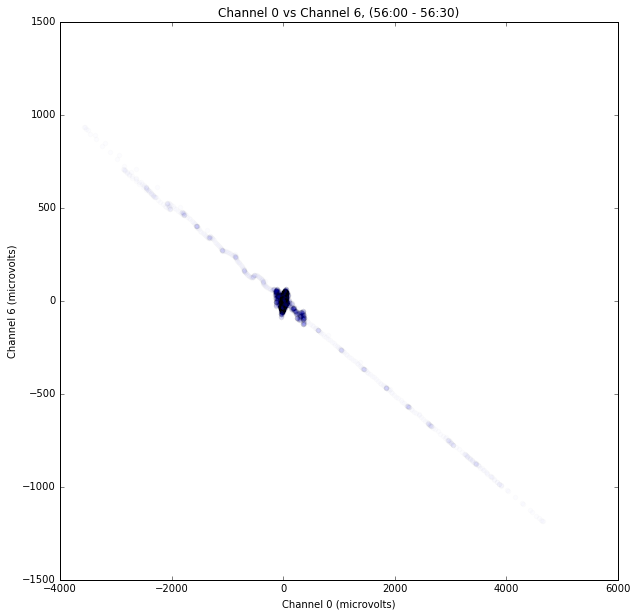

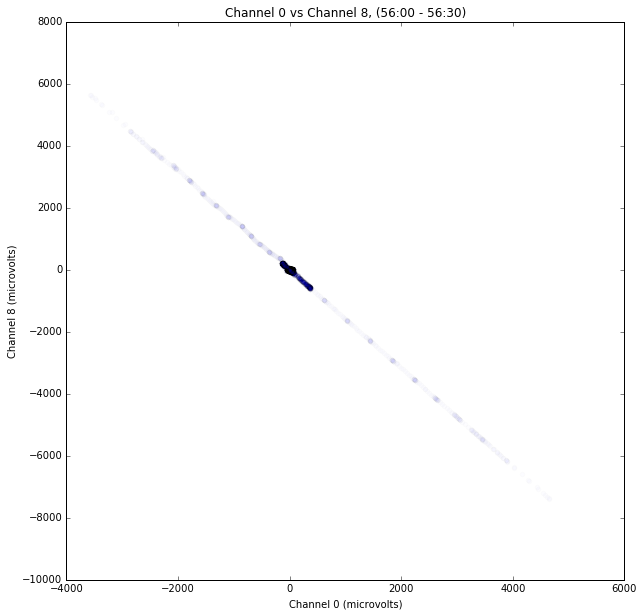

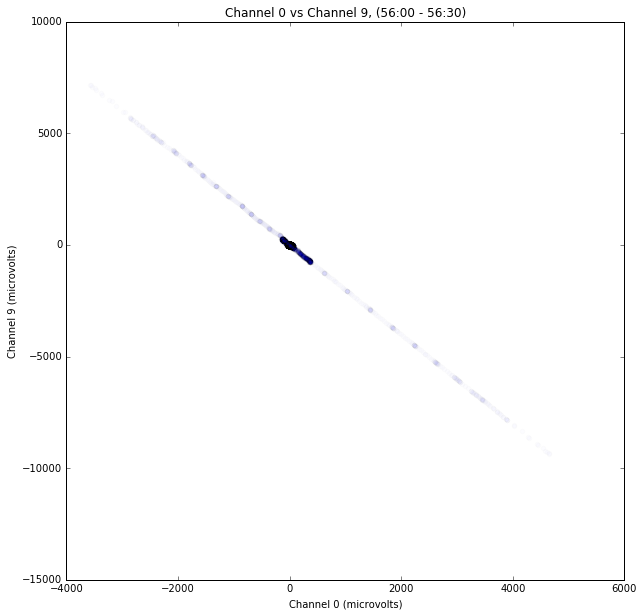

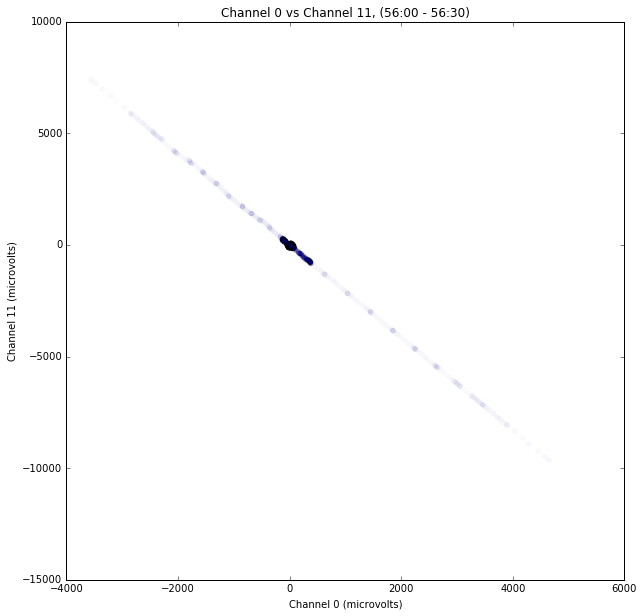

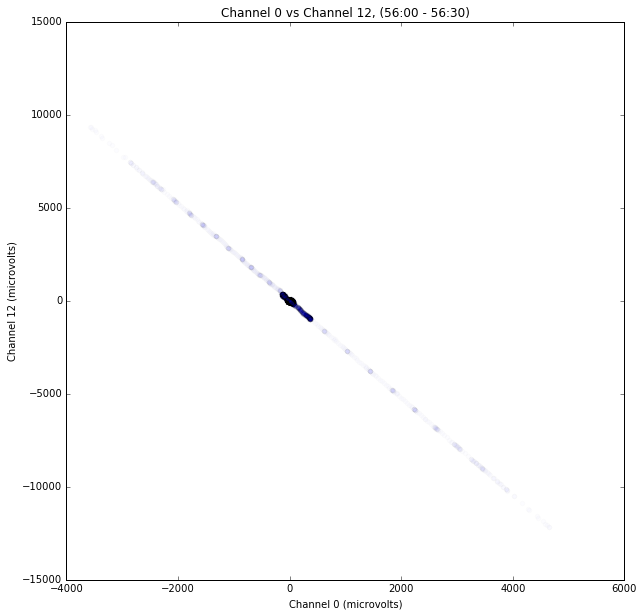

In [40]:
counter = 10
for interval, edge in high_negative:
    if counter > 0:
        counter -= 1
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(1,1,1)
        key1, key2 = edge_to_channel[edge]
        time_start = interval * 30000
        time_end = time_start + 30000

        if(time_start%60000 == 0):
            time_frame = str(time_start/60000) + ":00 - " + str(time_start/60000) + ":30"
        else:
            time_frame = str(time_start/60000) + ":30 - " + str(time_start/60000 + 1) + ":00"

        ax.scatter(data[key1][time_start:time_end], data[key2][time_start:time_end], alpha=0.01)
        ax.set_xlabel('Channel %s (microvolts)' %key1)
        ax.set_ylabel('Channel %s (microvolts)' %key2)
        ax.set_title('Channel %s vs Channel %s, (%s)' %(key1, key2, time_frame))
        plt.show()

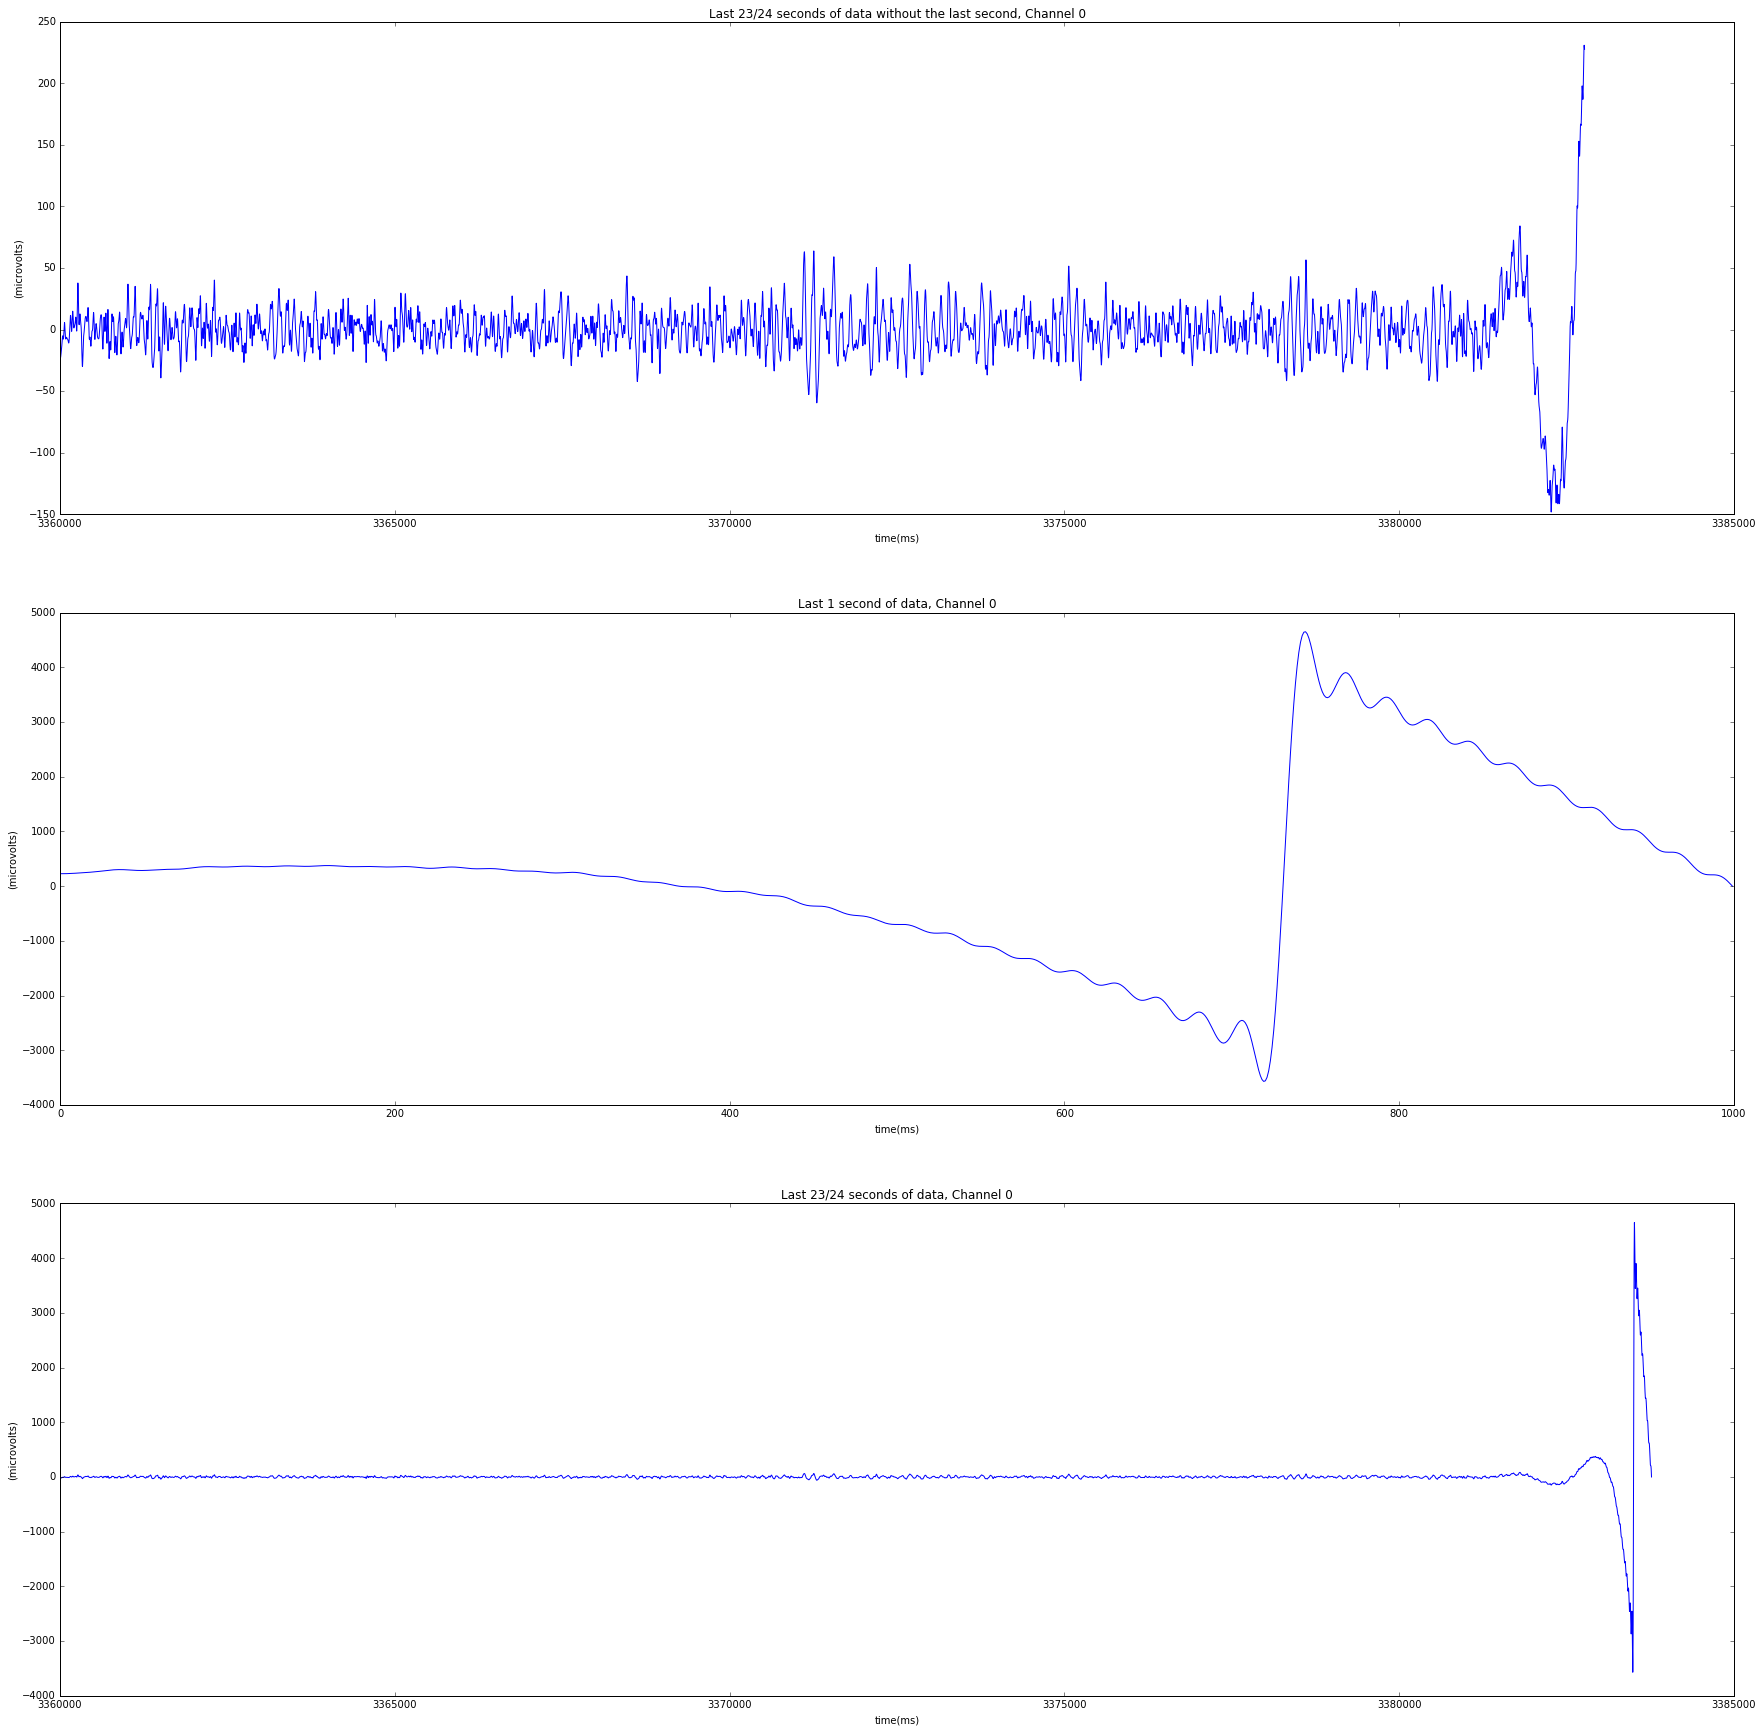

In [76]:
split_point = 3382768
fig = plt.figure(figsize=(30,30))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)
ax1.plot(range(3360000, split_point), data[0][3360000:split_point])
ax1.set_title('Last 23/24 seconds of data without the last second, Channel 0')
ax1.set_xlabel("time(ms)")
ax1.set_ylabel("(microvolts)")

ax2.plot(range(1000), data[0][3382768:])
ax2.set_title('Last 1 second of data, Channel 0')
ax2.set_xlabel("time(ms)")
ax2.set_ylabel("(microvolts)")

ax3.plot(range(3360000, 3383768), data[0][3360000:])
ax3.set_title('Last 23/24 seconds of data, Channel 0')
ax3.set_xlabel("time(ms)")
ax3.set_ylabel("(microvolts)")
plt.savefig("Last interval after ICA")
plt.show()
# print len(range(3360000, 3376000)), len(data[2][3360000:3376000])

In [76]:
split_corr = [num] + [sets]
print sum(num)
print split_corr

111630
[[0, 0, 0, 3, 39, 35, 53, 133, 454, 880, 3135, 6091, 8181, 10715, 12414, 14324, 14549, 16122, 15848, 8654], [-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]]


In [7]:
import json as simplejson
with open('media/json/pearson/ICA/ICA-matrix-30s.json', 'w+') as f:
    p = [[float(column) for column in row] for row in data]
    f.write(simplejson.dumps({'name': 's5d2nap', 'data': p}))

cols = np.argsort(spectral_model.column_labels_)
rows = np.argsort(spectral_model.row_labels_)
indices_matrix = []   
for row in rows:
    for col in cols:
        indices_matrix.append((float(row),float(col)))

with open('media/json/pearson/ICA/fitted-indices-ICA-pearson-30s.json', 'w+') as f:
    f.write(simplejson.dumps({'name': 's5d2nap', 'data': indices_matrix}))

ValueError: x and y must have same first dimension

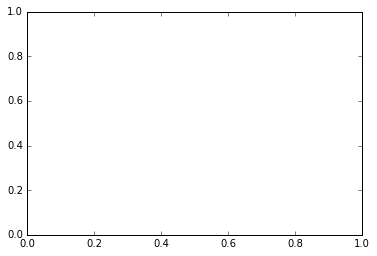

In [10]:
plt.plot(range(30000), data[34][33*30000:34*30000])
plt.show()

In [21]:
print data[33][90]

0.95
